# Data Frame

In [1]:
import pandas as pd
import os

scrip_dir = os.path.dirname(os.path.realpath('__file__'))
rel_path = "BanglaComments.csv"
abs_file_path = os.path.join(scrip_dir, rel_path)

df = pd.read_csv(abs_file_path) 

#df.columns = ['class','Sentence']


In [2]:
df['label'] = pd.factorize(df.Class)[0]
df.head()

,Class,Sentences,label
0,ntr,শেখ হাসিনার আশকারা পেয়ে সাকিব এখন বিশাল ক্ষমতা...,0
1,pos,শুভ কামনা,1
2,neg,এইসব মানুষ কখনো নিজেকে পরিবর্তনে নিয়ে আসতে পার...,2
3,ntr,ভাতিজা ছুটি নিলে বাইরে আগে থেকে খবর বের হয়না।,0
4,ntr,আর সাকিব ছুটি চাওয়ার আগেই আকরাম সাব ব্রিফিং কর...,0


In [3]:
df.describe()

,label
count,3006.000000
mean,1.020293
std,0.834721
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


# Lable Data Count Chart

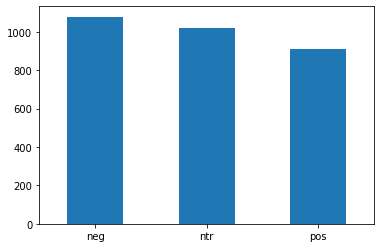

In [4]:
df['Class'].value_counts().plot(kind="bar", rot=0)

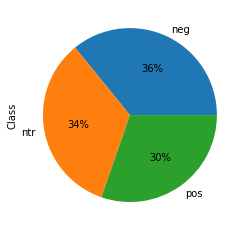

In [5]:
df['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Data Cleaning

In [6]:
import re

def clean_sentence(sent):
    sent = str(sent)
    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [7]:
df.loc[13,'Sentences']

'অনতি বিলম্বে বাংলাদেশ ক্রিকেট থেকে সাকিবকে বহিষ্কার করা হোক।বোর্ডের আশকারায় সাকিব একের পর এক বির্তকের জন্ম দিয়ে চলেছে।তাই এই বির্তকিত সাকিবের শাস্তি হওয়া এখন জরুরি।'

In [8]:
for i, sent  in enumerate(df['Sentences'].tolist()):
    df.loc[i,'clean_sentences'] = clean_sentence(sent)

In [9]:
test = df.loc[13,'clean_sentences']
test

'অনতি বিলম্বে বাংলাদেশ ক্রিকেট থেকে সাকিবকে বহিষ্কার করা হোকবোর্ডের আশকারায় সাকিব একের পর এক বির্তকের জন্ম দিয়ে চলেছেতাই এই বির্তকিত সাকিবের শাস্তি হওয়া এখন জরুরি'

# Stopword Removing

In [10]:
stp_wrd_lines = []
with open('stop_words.txt', encoding="utf8") as f:
    stp_wrd_lines = f.readlines()
    
stop_words = set()
for word in stp_wrd_lines:
    if word.strip()!='না':
        stop_words.add(word.strip())
print(len(stop_words))    
stop_words

397


{'অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [11]:
#!pip install sbnltk
from sbnltk.Stemmer import stemmerOP
st=stemmerOP()

def tokenized_data(sent):
    sent = st.stemSent(sent)
    tokenized_text = sent.split()
    return tokenized_text

tokenized_data(df.loc[13,'clean_sentences'])

['অনত',
 'বিলম্ব',
 'বাংলাদেশ',
 'ক্রিকেট',
 'থ',
 'সাকিব',
 'বহিষ্কার',
 'ক',
 'হোকবোর্ডের',
 'আশকারায়',
 'সাকিব',
 'এক',
 'পর',
 'এক',
 'বির্তকের',
 'জন্ম',
 'দি',
 'চলেছেতাই',
 'এই',
 'বির্তকিত',
 'সাকিব',
 'শাস্ত',
 'হওয়া',
 'এখন',
 'জরুর']

In [12]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [13]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : অনতি বিলম্বে বাংলাদেশ ক্রিকেট থেকে সাকিবকে বহিষ্কার করা হোকবোর্ডের আশকারায় সাকিব একের পর এক বির্তকের জন্ম দিয়ে চলেছেতাই এই বির্তকিত সাকিবের শাস্তি হওয়া এখন জরুরি
after : অনত বিলম্ব বাংলাদেশ ক্রিকেট থ সাকিব বহিষ্কার ক হোকবোর্ডের আশকারায় সাকিব এক এক বির্তকের জন্ম দি চলেছেতাই বির্তকিত সাকিব শাস্ত হওয়া জরুর


In [14]:
df['data_clean'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentences'].tolist()]

In [15]:
bang_alphabets = ['ঁ', 'ং', 'ঃ', 'অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ', 'ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', '়', 'ঽ', 'া', 'ি', 'ী', 'ু', 'ূ', 
                  'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ', '্', 'ৎ', 'ৗ', 'ড়', 'ঢ়', 'য়', 'ৠ', 'ৡ', 'ৢ', 'ৣ', '০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯', 'ৰ', 'ৱ', '৲', '৳', '৴', '৵', '৶', '৷', '৸', '৹', '৺', '৻', '\u09fc', '\u09fd', '\u09fe']

def bangla_single_alphabets_remove(sent):
    tokenized_text = sent.split()
    tokenized_text = [w for w in tokenized_text if not w in bang_alphabets]
    text = ' '.join(tokenized_text)
    return text

In [16]:
df['clean_data'] = [bangla_single_alphabets_remove(sent) for sent in df['data_clean'].tolist()]

In [17]:
print('before :', r_word)
print('before :', bangla_single_alphabets_remove(r_word))

before : অনত বিলম্ব বাংলাদেশ ক্রিকেট থ সাকিব বহিষ্কার ক হোকবোর্ডের আশকারায় সাকিব এক এক বির্তকের জন্ম দি চলেছেতাই বির্তকিত সাকিব শাস্ত হওয়া জরুর
before : অনত বিলম্ব বাংলাদেশ ক্রিকেট সাকিব বহিষ্কার হোকবোর্ডের আশকারায় সাকিব এক এক বির্তকের জন্ম দি চলেছেতাই বির্তকিত সাকিব শাস্ত হওয়া জরুর


In [18]:
cleaned_text = df['clean_data']
cleaned_text

0       শেখ হাসিন আশকা পা সাকিব বিশাল ক্ষমতাধরএখন চোখ ...
1                                               শুভ কামনা
2              এইসব মানুষ কখনো নিজ পরিবর্তন নি আস পারবেনা
3                     ভাতিজা ছুটি নিল বাইর আগ খব বের হয়না
4       সাকিব ছুটি চাওয়ার আগ আকরাম সাব ব্রিফিং কর সাংব...
                              ...                        
3001    সরকারী চাকরী ওয়ালারা লকডাউন পাইল ঠেকায় ঘর বস ব...
3002                                     মানুষ না খা মরবে
3003     মন কারন পরিষতিথি খারাপ হলেসামাল দেবার ক্ষমতা আমা
3004                           সামন রোজা কিচ্ছা কাহিনী গি
3005                           লক ডাউন দিল পরিবার ভার বহন
Name: clean_data, Length: 3006, dtype: object

In [19]:
refined_sentence = " ".join(cleaned_text)

In [20]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2021-06-12 12:30:15--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf.2’

kalpurush.ttf.2     100%[===================>] 307.22K   450KB/s    in 0.7s    

2021-06-12 12:30:17 (450 KB/s) - ‘kalpurush.ttf.2’ saved [314592/314592]



/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


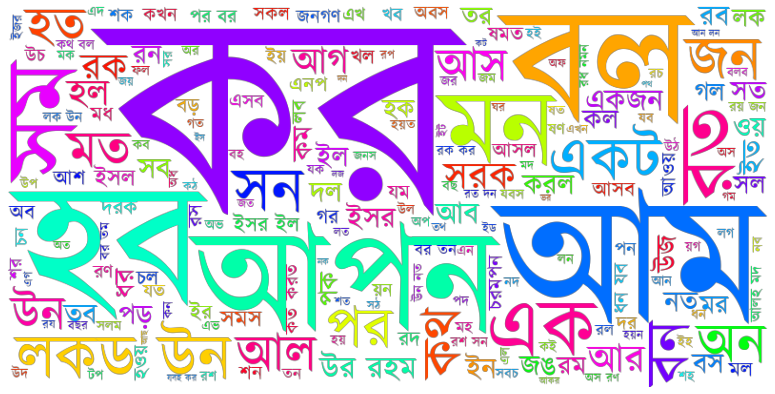

In [21]:
#!pip install wordcloud
#!pip install bnlp_toolkit


import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords

wc = WordCloud(width=800, height=400, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf").generate(refined_sentence)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

result = wc.to_file("Bengali_word_cloud.png")


# Preprocessing Data For model

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def ngram(gram_range1, gram_range2):
  
  word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(gram_range1, gram_range2), min_df=1, lowercase=False,
                                            token_pattern=u'[\S]+', tokenizer=None)


  word_vectorizerGram.fit_transform(df['clean_data'])
  stpGram = word_vectorizerGram.get_feature_names()
  return stpGram, word_vectorizerGram


In [23]:
import numpy as np
def sentence_to_vector_transform(line, gram_range1, gram_range2, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(gram_range1, gram_range2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [24]:
def sentence_to_vector(data, stpGram,gram_range1,gram_range2):
    dataForSVM = []

    for idx, sent in enumerate(data):
      
        sent = sentence_to_vector_transform(sent, gram_range1, gram_range2, stpGram)
        #print(sent)
        try:
            dataForSVM.append(sent)
        except:
            continue 
    return dataForSVM

Bigram

In [25]:
stpGram_bi, word_vectorizerGram_bi = ngram(1,2)
print(len(stpGram_bi))
print(word_vectorizerGram_bi.vocabulary_)

25240
{'শেখ': 21849, 'হাসিন': 24789, 'আশকা': 2010, 'পা': 13341, 'সাকিব': 23005, 'বিশাল': 16795, 'ক্ষমতাধরএখন': 6025, 'চোখ': 7709, 'বিসিবি': 16916, 'বস': 15587, 'চেয়': 7687, 'শেখ হাসিন': 21857, 'হাসিন আশকা': 24790, 'আশকা পা': 2011, 'পা সাকিব': 13361, 'সাকিব বিশাল': 23041, 'বিশাল ক্ষমতাধরএখন': 16796, 'ক্ষমতাধরএখন চোখ': 6026, 'চোখ বিসিবি': 7717, 'বিসিবি বস': 16920, 'বস চেয়': 15597, 'চেয় সাকিব': 7693, 'সাকিব সাকিব': 23063, 'সাকিব শেখ': 23060, 'শুভ': 21821, 'কামনা': 5302, 'শুভ কামনা': 21822, 'এইসব': 3082, 'মানুষ': 19001, 'কখনো': 4008, 'নিজ': 12384, 'পরিবর্তন': 13212, 'নি': 12204, 'আস': 2047, 'পারবেনা': 13669, 'এইসব মানুষ': 3087, 'মানুষ কখনো': 19020, 'কখনো নিজ': 4017, 'নিজ পরিবর্তন': 12408, 'পরিবর্তন নি': 13223, 'নি আস': 12218, 'আস পারবেনা': 2072, 'ভাতিজা': 17843, 'ছুটি': 7904, 'নিল': 12624, 'বাইর': 15864, 'আগ': 913, 'খব': 6097, 'বের': 17187, 'হয়না': 25110, 'ভাতিজা ছুটি': 17844, 'ছুটি নিল': 7909, 'নিল বাইর': 12628, 'বাইর আগ': 15865, 'আগ খব': 931, 'খব বের': 6104, 'বের হয়না': 17196, 'চাওয়ার': 

In [26]:
dataForSVM_bi = sentence_to_vector(df['clean_data'], stpGram_bi, 1, 2)
print(dataForSVM_bi[0:2])
print(len(df['clean_data']))

vector_bi = word_vectorizerGram_bi.transform([df.loc[15,'clean_data']])

print(vector_bi.shape)
print(type(vector_bi))
print(vector_bi.toarray())
print('sample of bigram : ',stpGram_bi[20])

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]
3006
(1, 25240)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]]
sample of bigram :  অইসময়


Uni Gram

In [27]:
stpGram_uni, word_vectorizerGram_uni = ngram(1,1)
print(len(stpGram_uni))
print(word_vectorizerGram_uni.vocabulary_)

dataForSVM_uni = sentence_to_vector(df['clean_data'], stpGram_uni, 1, 1)
print(dataForSVM_uni[0:2])
print(len(df['clean_data']))


vector_uni = word_vectorizerGram_uni.transform([df.loc[15,'clean_data']])

print(vector_uni.shape)
print(type(vector_uni))
print(vector_uni.toarray())
print('sample of bigram : ',stpGram_uni[20])

6786
{'শেখ': 5830, 'হাসিন': 6617, 'আশকা': 518, 'পা': 3447, 'সাকিব': 6103, 'বিশাল': 4450, 'ক্ষমতাধরএখন': 1482, 'চোখ': 1976, 'বিসিবি': 4475, 'বস': 4146, 'চেয়': 1971, 'শুভ': 5817, 'কামনা': 1275, 'এইসব': 832, 'মানুষ': 5040, 'কখনো': 1036, 'নিজ': 3156, 'পরিবর্তন': 3407, 'নি': 3138, 'আস': 529, 'পারবেনা': 3532, 'ভাতিজা': 4756, 'ছুটি': 2035, 'নিল': 3229, 'বাইর': 4188, 'আগ': 322, 'খব': 1509, 'বের': 4566, 'হয়না': 6721, 'চাওয়ার': 1868, 'আকরাম': 312, 'সাব': 6133, 'ব্রিফিং': 4683, 'কর': 1101, 'সাংবাদিক': 6085, 'জানি': 2154, 'দেয়': 2914, 'ঠেল': 2396, 'নাম': 3096, 'বাবাজি': 4277, 'হ্যালো': 6709, 'ভাইয়েরা': 4745, 'শাকিব': 5739, 'আল': 491, 'হাসান': 6614, 'বল': 4102, 'ধর': 2962, 'পাপন': 3504, 'দা': 2673, 'চা': 1848, 'না': 3052, 'মত': 4901, 'খেলোয়ার': 1579, 'যুগ': 5342, 'বছরে': 4041, 'খেলোয়াড়': 1578, 'জন্ম': 2100, 'নে': 3273, 'বলুক': 4134, 'বাংলাদেশ': 4180, 'দল': 2662, 'আইপিএল': 282, 'সুযোগ': 6276, 'পে': 3660, 'জাতী': 2140, 'বিদেশ': 4376, 'লীগ': 5660, 'খেলা': 1568, 'বেইমানী': 4539, 'ক্রিকেট': 1459, 'ব

Tri Gram

In [28]:
stpGram_tri, word_vectorizerGram_tri = ngram(1,3)
print(len(stpGram_tri))
print(word_vectorizerGram_tri.vocabulary_)

dataForSVM_tri = sentence_to_vector(df['clean_data'], stpGram_tri, 1, 3)
print(dataForSVM_tri[0:2])
print(len(df['clean_data']))

vector_tri = word_vectorizerGram_tri.transform([df.loc[15,'clean_data']])

print(vector_tri.shape)
print(type(vector_tri))
print(vector_tri.toarray())
print('sample of bigram : ',stpGram_tri[20])

43585
{'শেখ': 37753, 'হাসিন': 42864, 'আশকা': 3508, 'পা': 23134, 'সাকিব': 39787, 'বিশাল': 29043, 'ক্ষমতাধরএখন': 10638, 'চোখ': 13432, 'বিসিবি': 29256, 'বস': 26890, 'চেয়': 13393, 'শেখ হাসিন': 37774, 'হাসিন আশকা': 42865, 'আশকা পা': 3509, 'পা সাকিব': 23173, 'সাকিব বিশাল': 39861, 'বিশাল ক্ষমতাধরএখন': 29044, 'ক্ষমতাধরএখন চোখ': 10639, 'চোখ বিসিবি': 13445, 'বিসিবি বস': 29263, 'বস চেয়': 26908, 'চেয় সাকিব': 13404, 'সাকিব সাকিব': 39910, 'সাকিব শেখ': 39903, 'শেখ হাসিন আশকা': 37775, 'হাসিন আশকা পা': 42866, 'আশকা পা সাকিব': 3510, 'পা সাকিব বিশাল': 23174, 'সাকিব বিশাল ক্ষমতাধরএখন': 39862, 'বিশাল ক্ষমতাধরএখন চোখ': 29045, 'ক্ষমতাধরএখন চোখ বিসিবি': 10640, 'চোখ বিসিবি বস': 13446, 'বিসিবি বস চেয়': 29264, 'বস চেয় সাকিব': 26909, 'চেয় সাকিব সাকিব': 13405, 'সাকিব সাকিব শেখ': 39912, 'সাকিব শেখ হাসিন': 39904, 'শুভ': 37709, 'কামনা': 9431, 'শুভ কামনা': 37710, 'এইসব': 5334, 'মানুষ': 32796, 'কখনো': 6976, 'নিজ': 21536, 'পরিবর্তন': 22917, 'নি': 21193, 'আস': 3573, 'পারবেনা': 23692, 'এইসব মানুষ': 5343, 'মানুষ কখনো': 328

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(dataForSVM_uni, df['label'].values, test_size=0.2, random_state=0)

In [30]:
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(dataForSVM_bi, df['label'].values, test_size=0.2, random_state=0)

In [31]:
X_train_tri, X_test_tri, y_train_tri, y_test_tri = train_test_split(dataForSVM_tri, df['label'].values, test_size=0.2, random_state=0)

# Model Building

In [32]:
print(len(X_test_uni))
print(len(X_test_bi))
print(len(X_test_tri))

602
602
602


Uni Gram Model

In [33]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train_uni, y_train_uni)

In [34]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc = rbf_svc.fit(X_train_uni, y_train_uni)

In [35]:
poly_svc = SVC(kernel='poly', degree=3, C=C)
poly_svc = poly_svc.fit(X_train_uni, y_train_uni)

Bi Gram Model

In [36]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc_bi = SVC(kernel='linear', C=C)
linear_svc_bi = linear_svc_bi.fit(X_train_bi, y_train_bi)

In [37]:
rbf_svc_bi = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc_bi = rbf_svc_bi.fit(X_train_bi, y_train_bi)

In [38]:
poly_svc_bi = SVC(kernel='poly', degree=3, C=C)
poly_svc_bi = poly_svc_bi.fit(X_train_bi, y_train_bi)

Tri Gram Model

In [39]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc_tri = SVC(kernel='linear', C=C)
linear_svc_tri = linear_svc_tri.fit(X_train_tri, y_train_tri)

In [40]:
rbf_svc_tri = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc_tri = rbf_svc_tri.fit(X_train_tri, y_train_tri)

In [41]:
poly_svc_tri = SVC(kernel='poly', degree=3, C=C)
poly_svc_tri = poly_svc_tri.fit(X_train_tri, y_train_tri)

# Accuracy Calculation

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def cm_cr_ac(y_test_, predictions,kernel):
  print(kernel+ " : ")
  print(confusion_matrix(y_test_,predictions))
  print(classification_report(y_test_,predictions))
  print(accuracy_score(y_test_, predictions))

Uni gram Model Accuracy

In [43]:
predictions_linear_uni = linear_svc.predict(X_test_uni)

In [44]:
cm_cr_ac(y_test_uni, predictions_linear_uni,"linear")


linear : 
[[ 97  42  60]
 [ 25 142  18]
 [ 62  35 121]]
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       199
           1       0.65      0.77      0.70       185
           2       0.61      0.56      0.58       218

    accuracy                           0.60       602
   macro avg       0.59      0.60      0.60       602
weighted avg       0.59      0.60      0.59       602

0.5980066445182725


In [45]:
predictions_rbf_uni = rbf_svc.predict(X_test_uni)
cm_cr_ac(y_test_uni, predictions_rbf_uni, "rbf")

rbf : 
[[ 42  16 141]
 [ 11 111  63]
 [ 20  12 186]]
              precision    recall  f1-score   support

           0       0.58      0.21      0.31       199
           1       0.80      0.60      0.69       185
           2       0.48      0.85      0.61       218

    accuracy                           0.56       602
   macro avg       0.62      0.55      0.54       602
weighted avg       0.61      0.56      0.53       602

0.5631229235880398


In [46]:
predictions_poly_uni = poly_svc.predict(X_test_uni)
cm_cr_ac(y_test_uni, predictions_poly_uni,'poly')

poly : 
[[ 28 118  53]
 [  4 170  11]
 [ 13 103 102]]
              precision    recall  f1-score   support

           0       0.62      0.14      0.23       199
           1       0.43      0.92      0.59       185
           2       0.61      0.47      0.53       218

    accuracy                           0.50       602
   macro avg       0.56      0.51      0.45       602
weighted avg       0.56      0.50      0.45       602

0.4983388704318937


Bi gram Model Accuracy

In [47]:
predictions_linear_bi = linear_svc_bi.predict(X_test_bi)
cm_cr_ac(y_test_bi, predictions_linear_bi,"linear")

linear : 
[[ 99  55  45]
 [ 22 150  13]
 [ 61  49 108]]
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       199
           1       0.59      0.81      0.68       185
           2       0.65      0.50      0.56       218

    accuracy                           0.59       602
   macro avg       0.60      0.60      0.59       602
weighted avg       0.60      0.59      0.59       602

0.5930232558139535


In [48]:
predictions_rbf_bi = rbf_svc_bi.predict(X_test_bi)
cm_cr_ac(y_test_bi, predictions_rbf_bi, "rbf")

rbf : 
[[ 27  11 161]
 [  5  84  96]
 [  1   6 211]]
              precision    recall  f1-score   support

           0       0.82      0.14      0.23       199
           1       0.83      0.45      0.59       185
           2       0.45      0.97      0.62       218

    accuracy                           0.53       602
   macro avg       0.70      0.52      0.48       602
weighted avg       0.69      0.53      0.48       602

0.5348837209302325


In [49]:
predictions_poly_bi = poly_svc_bi.predict(X_test_bi)
cm_cr_ac(y_test_bi, predictions_poly_bi,'poly')

poly : 
[[ 23 145  31]
 [  2 176   7]
 [  8 137  73]]
              precision    recall  f1-score   support

           0       0.70      0.12      0.20       199
           1       0.38      0.95      0.55       185
           2       0.66      0.33      0.44       218

    accuracy                           0.45       602
   macro avg       0.58      0.47      0.40       602
weighted avg       0.59      0.45      0.39       602

0.45182724252491696


Tri gram Model Accuracy

In [50]:
predictions_linear_tri = linear_svc_tri.predict(X_test_tri)
cm_cr_ac(y_test_tri, predictions_linear_tri,"linear")

linear : 
[[ 91  59  49]
 [ 22 152  11]
 [ 53  56 109]]
              precision    recall  f1-score   support

           0       0.55      0.46      0.50       199
           1       0.57      0.82      0.67       185
           2       0.64      0.50      0.56       218

    accuracy                           0.58       602
   macro avg       0.59      0.59      0.58       602
weighted avg       0.59      0.58      0.58       602

0.584717607973422


In [51]:
predictions_rbf_tri = rbf_svc_tri.predict(X_test_tri)
cm_cr_ac(y_test_tri, predictions_rbf_tri, "rbf")

rbf : 
[[ 25  11 163]
 [  3  84  98]
 [  1   6 211]]
              precision    recall  f1-score   support

           0       0.86      0.13      0.22       199
           1       0.83      0.45      0.59       185
           2       0.45      0.97      0.61       218

    accuracy                           0.53       602
   macro avg       0.71      0.52      0.47       602
weighted avg       0.70      0.53      0.47       602

0.53156146179402


In [52]:
predictions_poly_tri = poly_svc_tri.predict(X_test_tri)
cm_cr_ac(y_test_tri, predictions_poly_tri,'poly')

poly : 
[[ 18 165  16]
 [  0 178   7]
 [  2 169  47]]
              precision    recall  f1-score   support

           0       0.90      0.09      0.16       199
           1       0.35      0.96      0.51       185
           2       0.67      0.22      0.33       218

    accuracy                           0.40       602
   macro avg       0.64      0.42      0.33       602
weighted avg       0.65      0.40      0.33       602

0.40365448504983387


In [53]:
from sklearn.externals import joblib
filename = 'linear_svc_uni_model.sav'
joblib.dump(linear_svc, filename)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['linear_svc_uni_model.sav']

In [54]:
sent = 'এটা আমাদের বাংলাদেশের গর্ব সাবাস বাই মোস্তাফিজ'
classDict = {'neg': 2, 'pos': 1,'ntr': 0}
sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent,1,1,stpGram_uni)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = joblib.load(filename)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[1]
{'neg': 2, 'pos': 1, 'ntr': 0}
pos
